In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("repartition2023.csv")
df2 = pd.read_csv("repartition2024.csv")
df3 = pd.read_csv("repartition2025.csv")

df1["Promotion"] = "Promo 20/21"
df2["Promotion"] = "Promo 21/22"
df3["Promotion"] = "Promo 22/23"

df_all = pd.concat([df1, df2, df3])


df_choices = df_all[df_all["Promotion"].isin(["Promo 20/21", "Promo 22/23"])]

choice_cols = ["Choix 1", "Choix 2", "Choix 3", "Choix 4"]

# Convert from wide to long format
df_long = df_choices.melt(
    id_vars=["Promotion"], 
    value_vars=choice_cols,
    var_name="ChoiceRank", 
    value_name="Major"
)

In [3]:
index = pd.Series(["Promo 20/21", "Promo 21/22", "Promo 22/23"])

df = pd.DataFrame({
    'Mean': [df1["MG-C"].mean(), df2["MG-C"].mean(), df3["MG-C"].mean()],
    'Median': [df1["MG-C"].median(), df2["MG-C"].median(), df3["MG-C"].median()]
}, index=index)

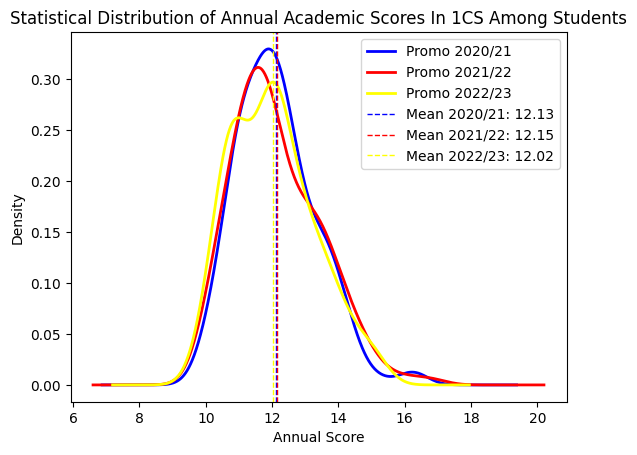

In [4]:
df1["MG-C"].plot.density(
    bw_method='scott',
    color='blue',
    linestyle='-',
    linewidth=2,
    label='Promo 2020/21')
df2["MG-C"].plot.density(
    bw_method='scott',
    color='red',
    linestyle='-',
    linewidth=2,
    label='Promo 2021/22')
df3["MG-C"].plot.density(
    bw_method='scott',
    color='yellow',
    linestyle='-',
    linewidth=2,
    label='Promo 2022/23')

plt.axvline(df["Mean"].get("Promo 20/21"), color='blue', linestyle='--', linewidth=1, label=f'Mean 2020/21: {df["Mean"].get("Promo 20/21"):.2f}')
plt.axvline(df["Mean"].get("Promo 21/22"), color='red', linestyle='--', linewidth=1, label=f'Mean 2021/22: {df["Mean"].get("Promo 21/22"):.2f}')
plt.axvline(df["Mean"].get("Promo 22/23"), color='yellow', linestyle='--', linewidth=1, label=f'Mean 2022/23: {df["Mean"].get("Promo 22/23"):.2f}')

plt.xlabel("Annual Score")
plt.legend()
plt.title("Statistical Distribution of Annual Academic Scores In 1CS Among Students")
plt.show()

<Axes: >

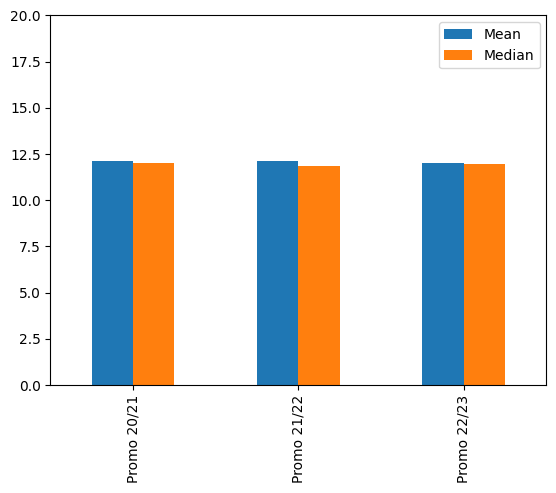

In [5]:
df.plot(kind="bar", ylim=(0, 20))

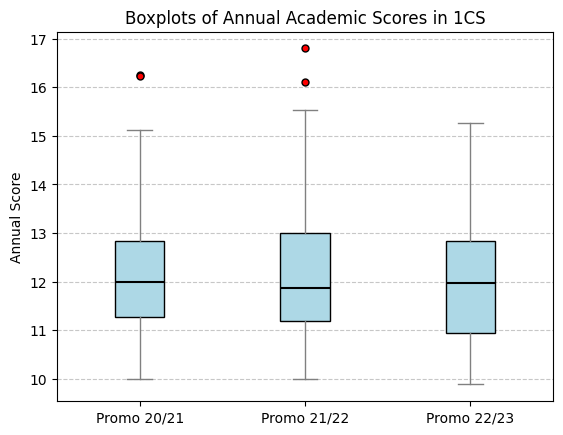

In [6]:
plt.boxplot(
    [df1["MG-C"], df2["MG-C"], df3["MG-C"]],
    labels=["Promo 20/21", "Promo 21/22", "Promo 22/23"],
    patch_artist=True,  # Filled boxes
    medianprops=dict(color="black", linewidth=1.5),
    boxprops=dict(facecolor="lightblue"),
    whiskerprops=dict(color="gray"),
    capprops=dict(color="gray"),
    flierprops=dict(markerfacecolor="red", marker="o", markersize=5, linestyle="none")
)

plt.ylabel("Annual Score")
plt.title("Boxplots of Annual Academic Scores in 1CS")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

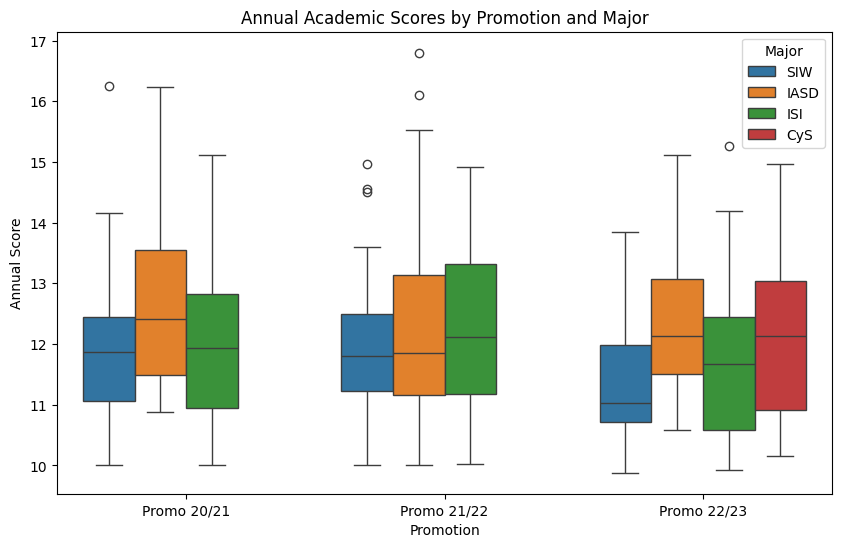

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_all,
    x="Promotion",
    y="MG-C",
    hue="Affectation"   # Groups by major inside each promotion
)

plt.title("Annual Academic Scores by Promotion and Major")
plt.xlabel("Promotion")
plt.ylabel("Annual Score")
plt.legend(title="Major")
plt.show()

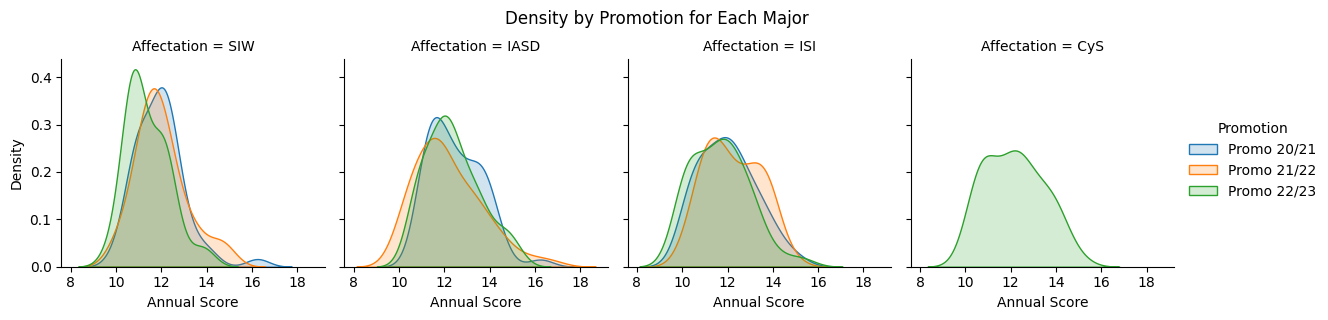

In [8]:
g_major = sns.FacetGrid(
    df_all, 
    col="Affectation",         # One subplot per Major
    hue="Promotion",     # Curves for each Promotion
    col_wrap=4,          # Adjust to fit your layout
    sharex=True, 
    sharey=True
)
g_major.map(sns.kdeplot, "MG-C", fill=True, alpha=0.2)
g_major.add_legend()
g_major.set_axis_labels("Annual Score", "Density")
g_major.fig.suptitle("Density by Promotion for Each Major", y=1.05)
plt.show()

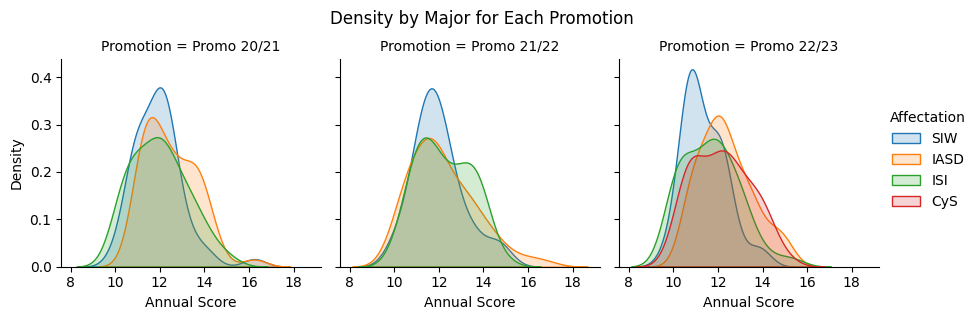

In [9]:
g_promo = sns.FacetGrid(
    df_all, 
    col="Promotion",     # One subplot per Promotion
    hue="Affectation",         # Curves for each Major
    col_wrap=3, 
    sharex=True, 
    sharey=True
)
g_promo.map(sns.kdeplot, "MG-C", fill=True, alpha=0.2)
g_promo.add_legend()
g_promo.set_axis_labels("Annual Score", "Density")
g_promo.fig.suptitle("Density by Major for Each Promotion", y=1.05)
plt.show()

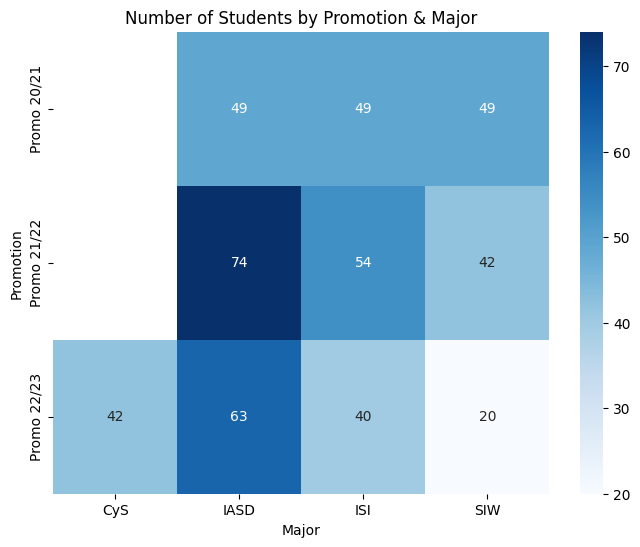

In [10]:
count_table = df_all.pivot_table(
    index="Promotion", 
    columns="Affectation", 
    values="MG-C",    # could be any column
    aggfunc="count"   # count entries
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(count_table, annot=True, cmap="Blues")
plt.title("Number of Students by Promotion & Major")
plt.xlabel("Major")
plt.ylabel("Promotion")
plt.show()

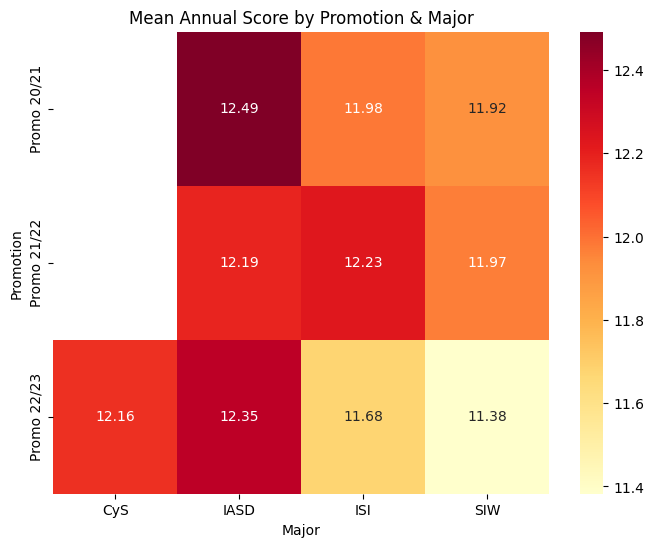

In [11]:
mean_table = df_all.pivot_table(
    index="Promotion",
    columns="Affectation",
    values="MG-C",
    aggfunc="mean"
)

plt.figure(figsize=(8, 6))
sns.heatmap(mean_table, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Mean Annual Score by Promotion & Major")
plt.xlabel("Major")
plt.ylabel("Promotion")
plt.show()


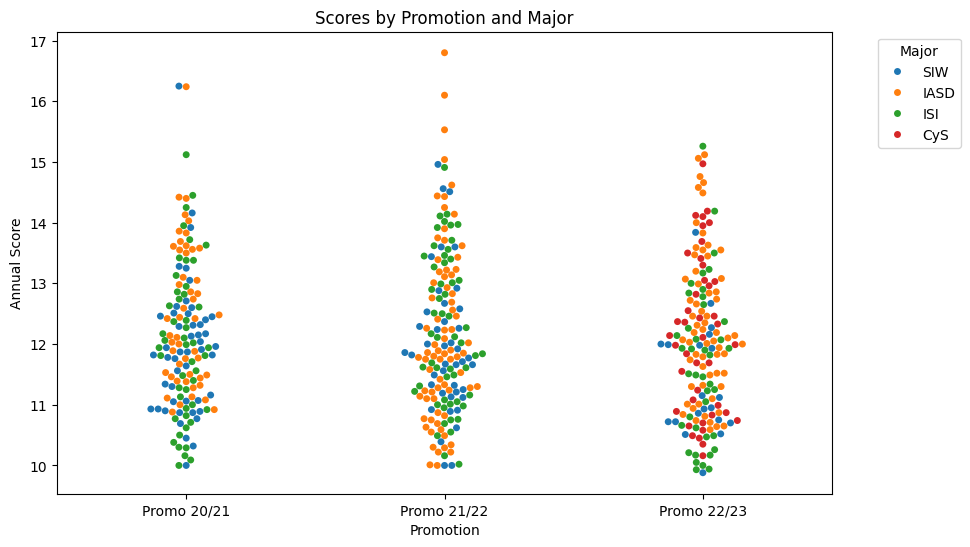

In [12]:
plt.figure(figsize=(10, 6))
sns.swarmplot(
    data=df_all,
    x="Promotion", 
    y="MG-C", 
    hue="Affectation"
)
plt.title("Scores by Promotion and Major")
plt.xlabel("Promotion")
plt.ylabel("Annual Score")
plt.legend(title="Major", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


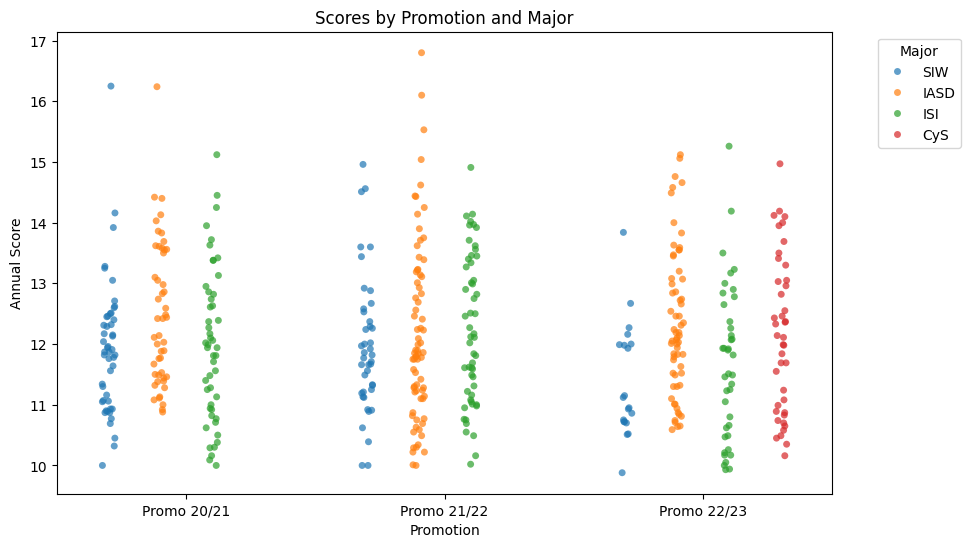

In [13]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_all,
    x="Promotion", 
    y="MG-C", 
    hue="Affectation",
    jitter=True,
    dodge=True,
    alpha=0.7
)
plt.title("Scores by Promotion and Major")
plt.xlabel("Promotion")
plt.ylabel("Annual Score")
plt.legend(title="Major", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


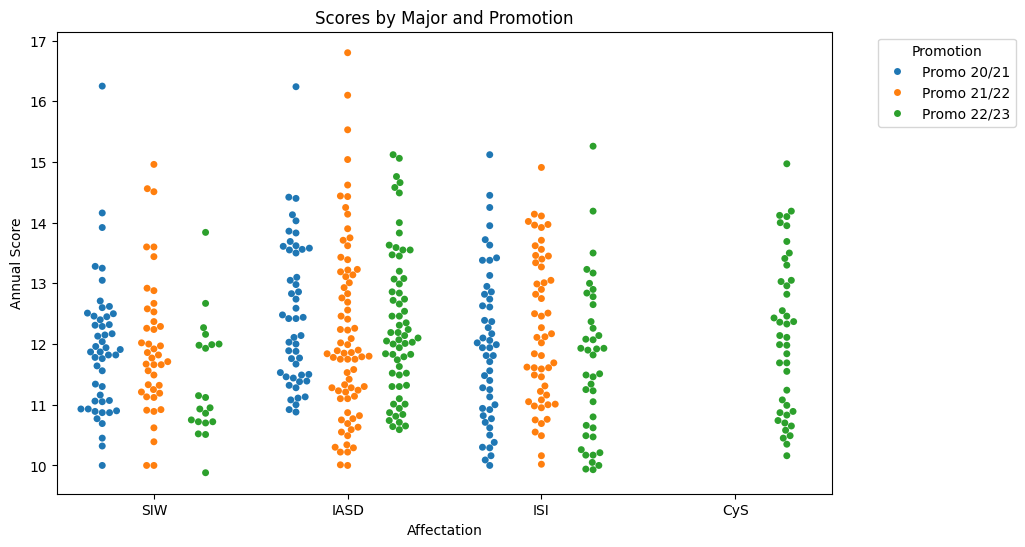

In [14]:
plt.figure(figsize=(10, 6))
sns.swarmplot(
    data=df_all,
    x="Affectation", y="MG-C",
    hue="Promotion", dodge=True
)
plt.title("Scores by Major and Promotion")
plt.ylabel("Annual Score")
plt.legend(title="Promotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


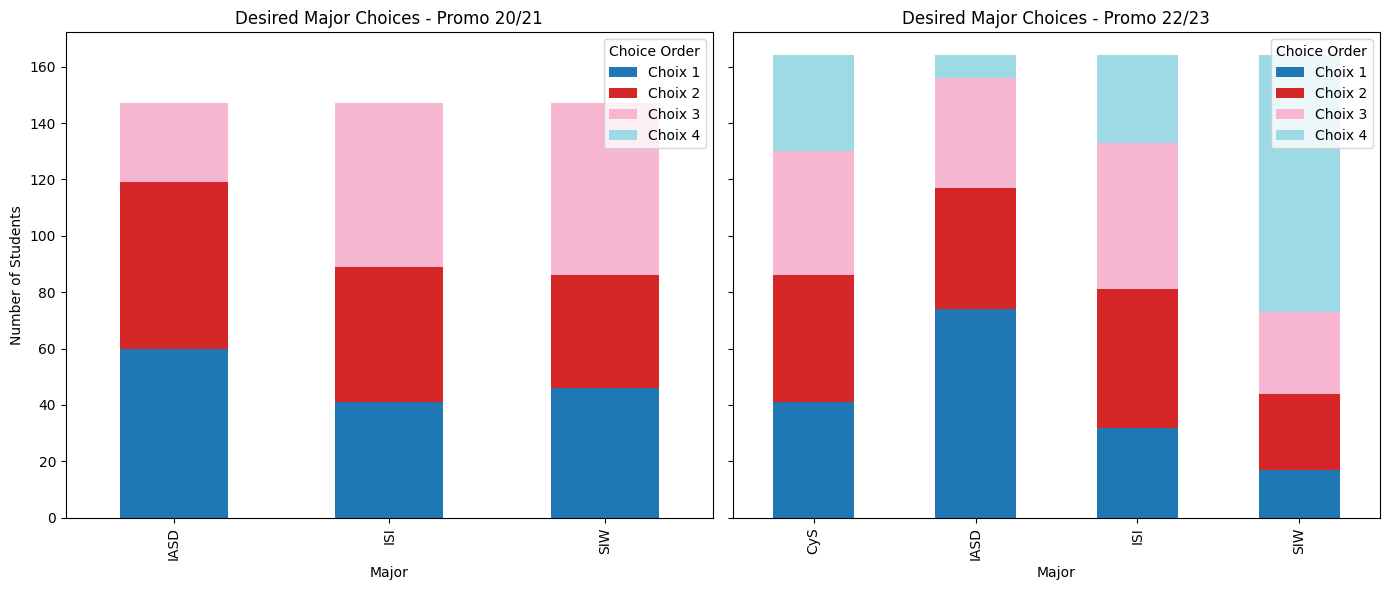

In [15]:
# Count number of students by Promotion + Major + ChoiceRank
counts = df_long.groupby(["Promotion", "Major", "ChoiceRank"]).size().reset_index(name="Count")

# Pivot so ChoiceRank becomes the columns for stacking
counts_pivot = counts.pivot_table(
    index=["Promotion", "Major"], 
    columns="ChoiceRank", 
    values="Count", 
    fill_value=0
)

# Plot stacked bars
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

promos = ["Promo 20/21", "Promo 22/23"]
for ax, promo in zip(axes, promos):
    data = counts_pivot.loc[promo]
    data.plot(
        kind="bar", 
        stacked=True, 
        ax=ax, 
        colormap="tab20"
    )
    ax.set_title(f"Desired Major Choices - {promo}")
    ax.set_xlabel("Major")
    ax.set_ylabel("Number of Students")
    ax.legend(title="Choice Order")

plt.tight_layout()
plt.show()